In [ ]:
import pandas as pd
df_sales=pd.read_csv("sales_data.csv")
df_sales

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [168]:
#checking correctness of columns
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [169]:
#cleaning category column
df_sales["category"] = df_sales["category"].str.strip().str.lower()

mapping = {
    "bgas": "bags",
    "bags": "bags",
    "shoeses": "shoes",
    "shoes": "shoes",
    "clothing": "clothing",
    "clohting": "clothing" 
}

df_sales["category"] = df_sales["category"].replace(mapping)

df_sales["category"] = df_sales["category"].fillna("other")

print(df_sales["category"].unique())

['electronics' 'clothing' 'accessories' 'bags' 'shoes']


In [170]:
#fill missing values of price column with median price
product_prices = df_sales.groupby("product")["price"].median()
df_sales["price"] = df_sales.apply(
    lambda r: product_prices[r["product"]] if pd.isnull(r["price"]) or r["price"] <= 0 else r["price"],
    axis=1
)

df_sales["revenue"] = df_sales["price"] * df_sales["quantity"]
df_sales

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,accessories,150.0,5.0,750.0
365,2022-12-28,Coat,clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,electronics,600.0,11.0,6600.0


In [171]:
#fill missing values of price column with median price
product_prices = df_sales.groupby("product")["quantity"].median()
df_sales["quantity"] = df_sales.apply(
    lambda r: product_prices[r["product"]] if pd.isnull(r["quantity"]) or r["quantity"] <= 0 else r["quantity"],
    axis=1
)

df_sales["revenue"] = df_sales["price"] * df_sales["quantity"]
df_sales

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,accessories,150.0,5.0,750.0
365,2022-12-28,Coat,clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,electronics,600.0,11.0,6600.0


In [172]:
#checking correctness of columns after filling missing values
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     369 non-null    float64
 4   quantity  369 non-null    float64
 5   revenue   369 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [173]:
#sum of all revenue
df_sales["revenue"].sum()


759130.0

In [174]:
# Calculate total revenue per product
df_sales.groupby("product")["revenue"].sum()

product
Backpack       20400.0
Coat           33800.0
Headphones     18000.0
Hoodie         21000.0
Jeans          20650.0
Laptop          6000.0
Smartphone    433200.0
Smartwatch     60800.0
Sneakers       21600.0
Speaker        39680.0
T-Shirt        20100.0
Tablet         18000.0
Wallet         13200.0
Watch          32700.0
Name: revenue, dtype: float64

In [175]:
# Calculate the average price of all products
df_sales["price"].mean()

210.5691056910569

In [176]:
df_sales["quantity"].sum()

5369.0

In [177]:
# Calculate the total quantity of products sold
df_sales.groupby("category")["revenue"].sum()

category
accessories    106700.0
bags            20400.0
clothing        95550.0
electronics    514880.0
shoes           21600.0
Name: revenue, dtype: float64

In [178]:
# Calculate total revenue per category
df_sales["revenue"].mean()

2057.262872628726

In [179]:
# Calculate the average revenue per sales
df_sales["date"] = pd.to_datetime(df_sales["date"])
df_sales["quarter"] = df_sales["date"].dt.quarter
quarter_revenue = df_sales.groupby("quarter")["revenue"].sum()
print(quarter_revenue)


quarter
1    182100.0
2    184770.0
3    197680.0
4    194580.0
Name: revenue, dtype: float64


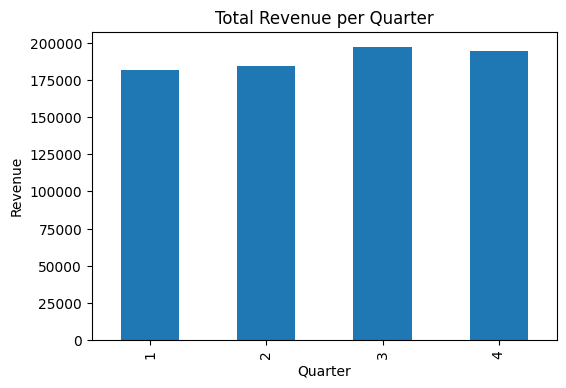

In [180]:
# Calculate total revenue per quarter
import matplotlib.pyplot as plt

quarter_revenue = df_sales.groupby("quarter")["revenue"].sum()

quarter_revenue.plot(kind="bar", figsize=(6,4))
plt.title("Total Revenue per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.show()


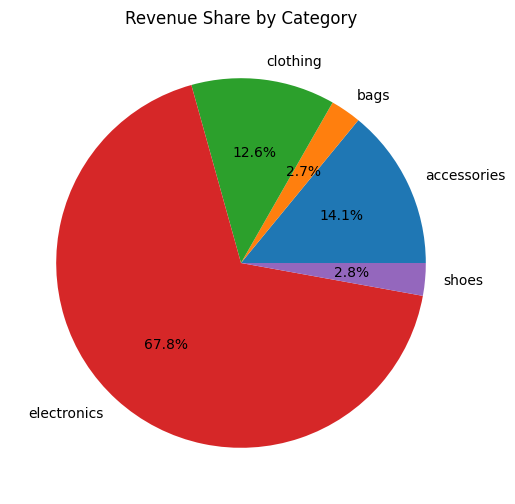

In [181]:
# Calculate total revenue per category
category_revenue = df_sales.groupby("category")["revenue"].sum()

category_revenue.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Revenue Share by Category")
plt.ylabel("") 
plt.show()


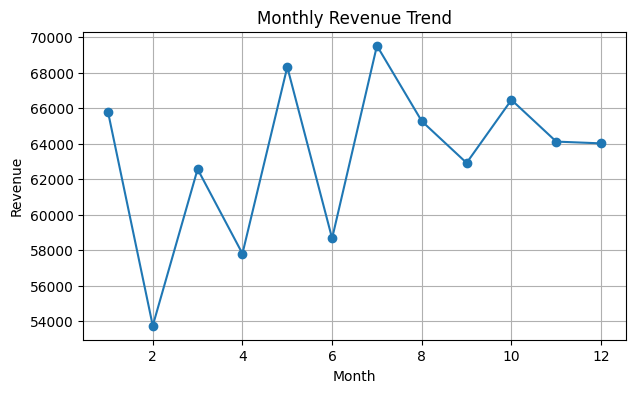

In [182]:
# Calculate total revenue per month
df_sales["month"] = df_sales["date"].dt.month
monthly_revenue = df_sales.groupby("month")["revenue"].sum()

monthly_revenue.plot(kind="line", marker="o", figsize=(7,4))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


In [183]:
df_sales.to_csv("sales_data_cleaned.csv", index=False)